In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
import core.qlearning2 as q2
import core.qlearning as q
import core.prices as pr

In [65]:
prices = pr.PriceOptimizer()

In [67]:
prices()

(1.9249648860897746, 1.4700000000000004)

In [68]:
find_ind2= q2.StateMapper(nb_players=2,num_bins=15,lower=prices()[1], upper=prices()[0], xi=0.1)

In [72]:
find_ind2.mapping_dict

{1.424503511391023: '00',
 1.463500501627289: '01',
 1.502497491863556: '02',
 1.541494482099822: '03',
 1.580491472336088: '04',
 1.619488462572355: '05',
 1.658485452808621: '06',
 1.697482443044888: '07',
 1.736479433281154: '08',
 1.77547642351742: '09',
 1.814473413753686: '10',
 1.853470403989953: '11',
 1.892467394226219: '12',
 1.931464384462486: '13',
 1.970461374698752: '14'}

In [75]:
find_ind2.all_state_dict['0006']

6

In [77]:
find_ind2.mapping_dict[1.658485452808621]

'06'

In [74]:
find_ind2([1.424503511391023,1.658485452808621])

6

# Same epsilon for the 2 players : Q-learning

## 1- Importation and cleaning

In [13]:
df = pd.read_csv('../final_data/epilon_qlearning.csv')
# Function to convert string to list of two numbers using regular expressions
def extract_numbers(text):
    numbers = re.findall(r'-?\d+\.?\d*(?:e[-+]?\d+)?', text)
    return [float(num) for num in numbers]

# Apply the function to the column and convert the strings into lists of two numbers
df['Rewards'] = df['Rewards'].apply(extract_numbers)
df['Prices'] = df['Prices'].apply(extract_numbers)
df['Epsilon'] = df['Epsilon'].apply(extract_numbers)

#Convert into int if digit
df['Iteration'] = df['Iteration'].apply(lambda x: int(x) if str(x).isdigit() else x)


#Separate the profits, prices and Epsilon of each player
df[['Reward1', 'Reward2']] = df['Rewards'].apply(lambda x: pd.Series(x))
df[['Price1', 'Price2']] = df['Prices'].apply(lambda x: pd.Series(x))
df[['Epsilon1', 'Epsilon2']] = df['Epsilon'].apply(lambda x: pd.Series(x))

#Drop the useless columns
df = df.drop(columns=['Rewards', 'Prices', 'Epsilon', 'Unnamed: 0'])

/var/folders/1v/lw80nwsd61d7sp0q_pzj0ppm0000gp/T/ipykernel_12569/854159991.py:17: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df[['Reward1', 'Reward2']] = df['Rewards'].apply(lambda x: pd.Series(x))
/var/folders/1v/lw80nwsd61d7sp0q_pzj0ppm0000gp/T/ipykernel_12569/854159991.py:18: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df[['Price1', 'Price2']] = df['Prices'].apply(lambda x: pd.Series(x))
/var/folders/1v/lw80nwsd61d7sp0q_pzj0ppm0000gp/T/ipykernel_12569/854159991.py:19: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df[['Epsilon1', 'Epsilon2']] = df['Epsilon'].apply(lambda x: pd.Series(x))


# Begin here if cleaning saved

In [21]:
df.to_csv('../final_data/same_eps_clean.csv')

### Separate the dataframe into 2: final for studying the final results and iterations for learning curves

In [23]:
lc_df = df[~(df['Iteration']=='last 100 iterations mean')]

,Iteration,beta,index,Reward1,Reward2,Price1,Price2,Epsilon1,Epsilon2
0,0,0.002500,1,0.200836,0.280438,1.619488,1.463501,1.000000e+00,1.000000e+00
1,10000,0.002500,1,0.191618,0.294214,1.658485,1.463501,1.392271e-11,1.392271e-11
2,20000,0.002500,1,0.191618,0.294214,1.658485,1.463501,1.933578e-22,1.933578e-22
3,30000,0.002500,1,0.191618,0.294214,1.658485,1.463501,2.685342e-33,2.685342e-33
4,40000,0.002500,1,0.191618,0.294214,1.658485,1.463501,3.729388e-44,3.729388e-44
...,...,...,...,...,...,...,...,...,...
190374,9960000,0.000025,10,0.230898,0.303181,1.658485,1.541494,7.255793e-109,7.255793e-109
190375,9970000,0.000025,10,0.169356,0.374251,1.853470,1.541494,5.650817e-109,5.650817e-109
190376,9980000,0.000025,10,0.292024,0.362483,1.853470,1.775476,4.400861e-109,4.400861e-109
190377,9990000,0.000025,10,0.372942,0.297940,1.853470,1.931464,3.427394e-109,3.427394e-109


In [24]:
fin_df = df[df['Iteration']=='last 100 iterations mean']

,Iteration,beta,index,Reward1,Reward2,Price1,Price2,Epsilon1,Epsilon2
1001,last 100 iterations mean,0.002500,1,0.240029,0.252429,1.658485,1.611689,0.000000e+00,0.000000e+00
2003,last 100 iterations mean,0.002500,2,0.328143,0.266708,1.711521,1.797315,0.000000e+00,0.000000e+00
3005,last 100 iterations mean,0.002500,3,0.245416,0.332796,1.822273,1.670964,0.000000e+00,0.000000e+00
4007,last 100 iterations mean,0.002500,4,0.257963,0.295301,1.734140,1.681104,0.000000e+00,0.000000e+00
5009,last 100 iterations mean,0.002500,5,0.289891,0.250191,1.580491,1.638987,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...
186371,last 100 iterations mean,0.000025,6,0.276473,0.276640,1.663555,1.664725,2.672563e-109,2.672563e-109
187373,last 100 iterations mean,0.000025,7,0.274269,0.287034,1.688123,1.674084,2.672563e-109,2.672563e-109
188375,last 100 iterations mean,0.000025,8,0.257218,0.314204,1.759878,1.689683,2.672563e-109,2.672563e-109
189377,last 100 iterations mean,0.000025,9,0.304346,0.271274,1.681884,1.723610,2.672563e-109,2.672563e-109


## 2- Learning curves

In [58]:
df['beta'].unique()

array([2.5e-03, 7.5e-07, 7.5e-04, 5.0e-07, 5.0e-05, 7.5e-05, 1.0e-03,
       5.0e-03, 7.5e-06, 5.0e-06, 7.5e-03, 2.5e-04, 5.0e-04, 2.5e-06,
       2.5e-07, 1.0e-07, 1.0e-04, 1.0e-05, 2.5e-05])

In [59]:
df_beta = lc_df[lc_df['beta']==1.0e-05]
df_beta

,Iteration,beta,index,Reward1,Reward2,Price1,Price2,Epsilon1,Epsilon2
170340,0,0.00001,1,0.200836,0.280438,1.619488,1.463501,1.000000e+00,1.000000e+00
170341,10000,0.00001,1,0.265055,0.362432,1.814473,1.697482,9.048465e-01,9.048465e-01
170342,20000,0.00001,1,0.230898,0.303181,1.658485,1.541494,8.187389e-01,8.187389e-01
170343,30000,0.00001,1,0.398683,0.192741,1.619488,1.892467,7.408256e-01,7.408256e-01
170344,40000,0.00001,1,0.387404,0.277472,1.814473,1.931464,6.703267e-01,6.703267e-01
...,...,...,...,...,...,...,...,...,...
180354,9960000,0.00001,10,0.291997,0.291997,1.658485,1.658485,5.549757e-44,5.549757e-44
180355,9970000,0.00001,10,0.291997,0.291997,1.658485,1.658485,5.021628e-44,5.021628e-44
180356,9980000,0.00001,10,0.291997,0.291997,1.658485,1.658485,4.543756e-44,4.543756e-44
180357,9990000,0.00001,10,0.291997,0.291997,1.658485,1.658485,4.111361e-44,4.111361e-44


In [60]:
mean_df = df_beta.groupby('Iteration')[['Reward1', 'Reward2', 'Price1', 'Price2', 'Epsilon1', 'Epsilon2', 'beta']].mean().reset_index()
mean_df

,Iteration,Reward1,Reward2,Price1,Price2,Epsilon1,Epsilon2,beta
0,0,0.217752,0.306406,1.732580,1.584391,1.000000e+00,1.000000e+00,0.00001
1,10000,0.243725,0.313164,1.720881,1.623388,9.048465e-01,9.048465e-01,0.00001
2,20000,0.272785,0.306660,1.755978,1.689683,8.187389e-01,8.187389e-01,0.00001
3,30000,0.274881,0.291110,1.716981,1.685783,7.408256e-01,7.408256e-01,0.00001
4,40000,0.266844,0.318191,1.787176,1.689683,6.703267e-01,6.703267e-01,0.00001
...,...,...,...,...,...,...,...,...
996,9960000,0.290692,0.284358,1.666285,1.674084,5.549757e-44,5.549757e-44,0.00001
997,9970000,0.270682,0.317112,1.736479,1.670185,5.021628e-44,5.021628e-44,0.00001
998,9980000,0.295123,0.290733,1.681884,1.685783,4.543756e-44,4.543756e-44,0.00001
999,9990000,0.290692,0.284358,1.666285,1.674084,4.111361e-44,4.111361e-44,0.00001


In [61]:
def plot_learning_curve(mean_df):
    # Assuming df contains 'Rewards' and 'Iteration' columns
    plt.figure(figsize=(10, 6))

    # Plot rewards for each player
    plt.plot(mean_df['Iteration'][mean_df['Iteration']<10**(6)], mean_df['Reward1'][mean_df['Iteration']<10**(6)],alpha=0.5, label='Player 1')
    plt.plot(mean_df['Iteration'][mean_df['Iteration']<10**(6)], mean_df['Reward2'][mean_df['Iteration']<10**(6)],alpha=0.5, label='Player 2')

    # Customize the plot
    plt.title('Learning Curves')
    plt.xlabel('Iteration')
    plt.ylabel('Rewards')
    plt.legend()
    plt.grid(True)
    plt.show()

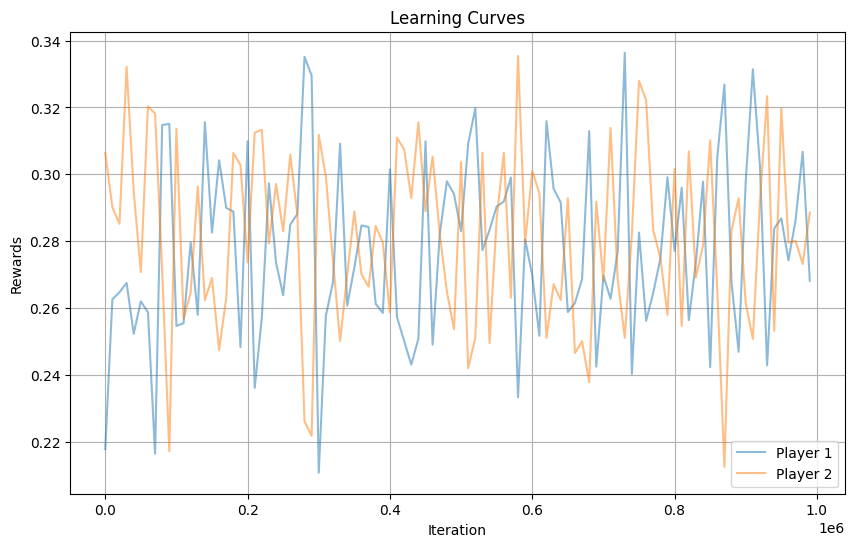

In [55]:
plot_learning_curve(mean_df)

In [16]:
def plot_learning_curve(df, beta):
    # Assuming df contains 'Rewards' and 'Iteration' columns
    plt.figure(figsize=(10, 6))

    # Plot rewards for each player
    num_players = len(df['Mean Rewards'][0])

    for player in range(num_players):
        plt.plot(df['Iteration'], [df['Rewards'][i][player] for i in df['Unnamed: 0']],alpha=0.5, label=f'Player {player + 1}')

    # Customize the plot
    plt.title('Learning Curves')
    plt.xlabel('Iteration')
    plt.ylabel('Rewards')
    plt.legend()
    plt.grid(True)
    plt.show()
    
filtred_df = df[~(df['Iteration']=='last 100 iterations mean')][['Iteration','Rewards', 'Prices','beta','Epsilon']]

In [11]:
filtred_df

,Rewards,Prices,beta,Epsilon
0,"[0.20083569, 0.28043792]","[1.619488462572355, 1.463500501627289]",0.002500,"[1.0, 1.0]"
1,"[0.19161785, 0.29421414]","[1.658485452808621, 1.463500501627289]",0.002500,"[1.392270716064011, 11.0, 1.392270716064011, 1..."
2,"[0.19161785, 0.29421414]","[1.658485452808621, 1.463500501627289]",0.002500,"[1.933577754953025, 22.0, 1.933577754953025, 2..."
3,"[0.19161785, 0.29421414]","[1.658485452808621, 1.463500501627289]",0.002500,"[2.6853419319330767, 33.0, 2.6853419319330767,..."
4,"[0.19161785, 0.29421414]","[1.658485452808621, 1.463500501627289]",0.002500,"[3.7293878008920602, 44.0, 3.7293878008920602,..."
...,...,...,...,...
190374,"[0.23089762, 0.30318062]","[1.658485452808621, 1.541494482099822]",0.000025,"[7.255792652155376, 109.0, 7.255792652155376, ..."
190375,"[0.1693556, 0.37425087]","[1.853470403989953, 1.541494482099822]",0.000025,"[5.650816999302352, 109.0, 5.650816999302352, ..."
190376,"[0.29202387, 0.36248322]","[1.853470403989953, 1.77547642351742]",0.000025,"[4.400860704049878, 109.0, 4.400860704049878, ..."
190377,"[0.37294167, 0.29794032]","[1.853470403989953, 1.931464384462486]",0.000025,"[3.427393762502219, 109.0, 3.427393762502219, ..."


In [12]:
filtred_df[filtred_df['beta']==0.002500].groupby(by='Iteration')['Rewards'].apply(lambda x: np.mean(x))

NameError: name 'filtred_df' is not defined

## 3- Final rewards and prices as a function of beta

In [24]:
filtred_df = df[df['Iteration']=='last 100 iterations mean'][['Rewards', 'Prices','beta','Epsilon']]

In [31]:
filtred_df['Epsilon'].value_counts()

Epsilon
[0.0, 0.0]                                90
[0.00055311, 0.00055311]                  10
[0.00673812, 0.00673812]                  10
[7.14259613, 218.0, 7.14259613, 218.0]    10
[2.67965175, 33.0, 2.67965175, 33.0]      10
[1.92923694, 22.0, 1.92923694, 22.0]      10
[1.38896974, 11.0, 1.38896974, 11.0]      10
[0.08208603, 0.08208603]                  10
[0.3678813, 0.3678813]                    10
[3.72195524, 44.0, 3.72195524, 44.0]      10
[2.67256289, 109.0, 2.67256289, 109.0]    10
Name: count, dtype: int64

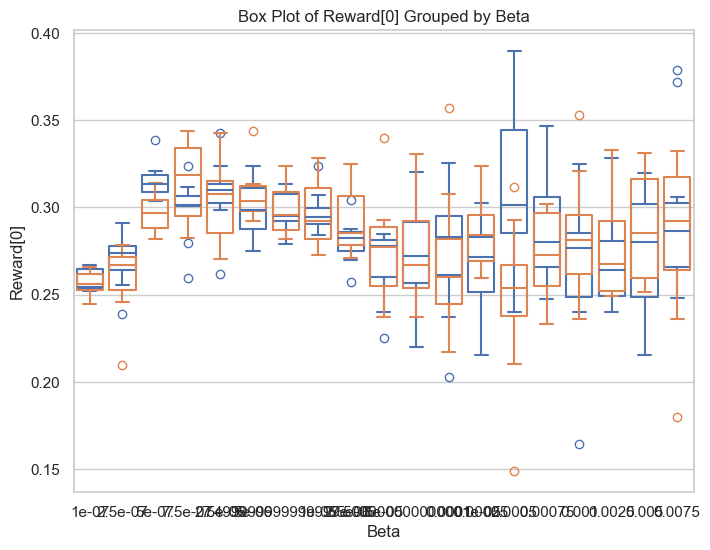

In [33]:
# Create a box plot using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x='beta', y=filtred_df['Rewards'].apply(lambda x: x[0]), data=filtred_df, fill=False)  # Plot the box plot
sns.boxplot(x='beta', y=filtred_df['Rewards'].apply(lambda x: x[1]), data=filtred_df, fill=False)
plt.xlabel('Beta')
plt.ylabel('Reward[0]')
plt.title('Box Plot of Reward[0] Grouped by Beta')
plt.show()

In [32]:
epsilon_qlearn_df['Prices'][0][0]

'['

## Plot Learning Curves

## Plot Rewards as a function of beta

In [20]:
df_final_rewards = epsilon_qlearn_df[epsilon_qlearn_df['Iteration']=='last 100 iterations mean'][['Rewards','beta']]

In [21]:
df_final_rewards

,Rewards,beta
1001,[0.24002856 0.25242936],0.002500
2003,[0.32814274 0.26670753],0.002500
3005,[0.24541585 0.33279624],0.002500
4007,[0.25796301 0.2953014 ],0.002500
5009,[0.28989133 0.2501908 ],0.002500
...,...,...
186371,[0.27647317 0.2766402 ],0.000025
187373,[0.27426902 0.28703427],0.000025
188375,[0.25721757 0.31420438],0.000025
189377,[0.3043459 0.27127401],0.000025


In [29]:
df_final_rewards['Rewards']

'['

In [23]:
import numpy as np

In [13]:
epsilon_qlearn_df[epsilon_qlearn_df['Iteration']=='last 100 iterations mean'].groupby(by='beta')['Rewards']

TypeError: <lambda>() got an unexpected keyword argument 'axis'

In [12]:
epsilon_qlearn_df[epsilon_qlearn_df['Iteration']=='last 100 iterations mean'].groupby(by='beta')['Rewards'].mean()

TypeError: agg function failed [how->mean,dtype->object]